<a href="https://colab.research.google.com/github/akbarjon2000/DataScience/blob/main/ML_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
warnings.filterwarnings('ignore')

In [7]:
Train_df = pd.read_csv("/content/train.csv")
Test_df = pd.read_csv("/content/test.csv")

In [27]:
print(Train_df.columns)
Train_df.head()

Index(['Feature', ' Label'], dtype='object')


,Feature,Label
0,0.963585,-0.229634
1,0.715377,-0.979414
2,0.896298,-0.608057
3,0.049025,0.306430
4,0.299481,0.952607


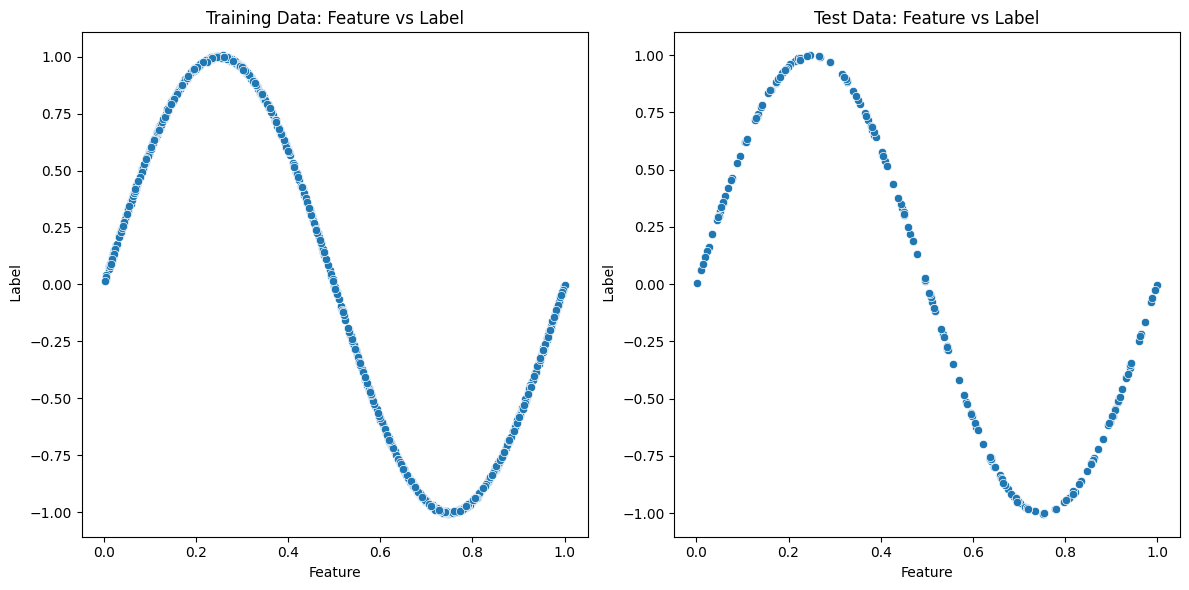

In [12]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Feature', y=' Label', data=Train_df)
plt.title('Training Data: Feature vs Label')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Feature', y=' Label', data=Test_df)
plt.title('Test Data: Feature vs Label')

plt.tight_layout()
plt.show()


Fitted slope: 0.00905120108117028
Fitted intercept: -0.0556471176909799


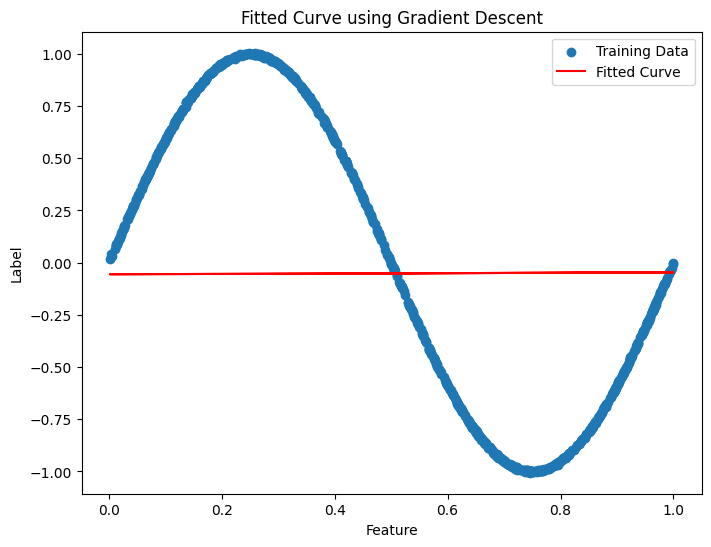

In [16]:
# Extract features and labels from the training data
X_train = Train_df['Feature'].values.reshape(-1, 1)
y_train = Train_df[' Label'].values

# Initialize model parameters (slope and intercept)
theta = np.random.rand(2)

# Define learning rate
learning_rate = 0.05

# Define number of iterations
num_iterations = 1000

# Gradient descent loop
for i in range(num_iterations):
  # Calculate predictions
  y_pred = theta[0] + theta[1] * X_train

  # Calculate the error
  error = y_pred - y_train

  # Calculate the gradient
  gradient_intercept = np.mean(error)
  gradient_slope = np.mean(error * X_train)

  # Update model parameters
  theta[0] -= learning_rate * gradient_intercept
  theta[1] -= learning_rate * gradient_slope

# Print the fitted parameters
print("Fitted slope:", theta[1])
print("Fitted intercept:", theta[0])

# Plot the fitted curve along with the data
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, label='Training Data')
plt.plot(X_train, theta[0] + theta[1] * X_train, color='red', label='Fitted Curve')
plt.xlabel('Feature')
plt.ylabel('Label')
plt.title('Fitted Curve using Gradient Descent')
plt.legend()
plt.show()


R-squared: -999.0145926875027


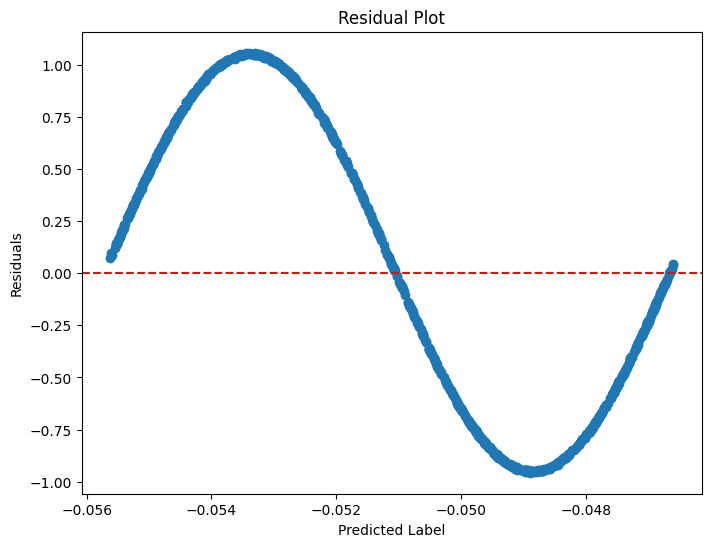

Test R-squared: -199.5698321453604


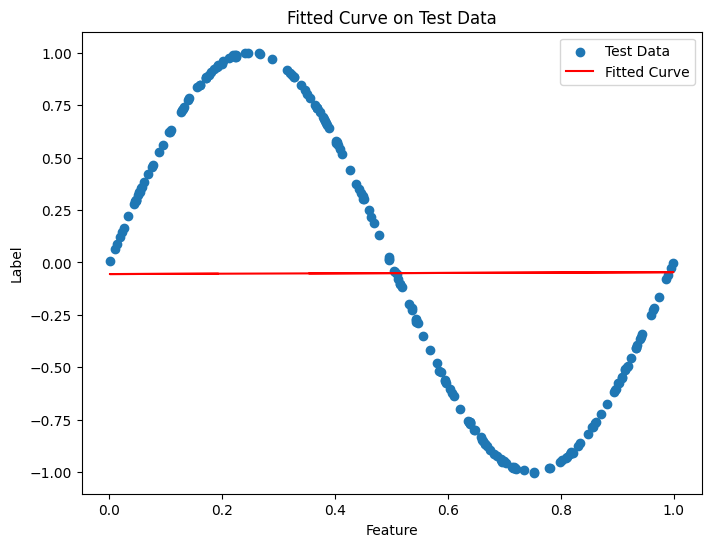

In [18]:
# Calculate R-squared to evaluate the goodness of fit
y_pred_train = theta[0] + theta[1] * X_train
ss_res = np.sum((y_train - y_pred_train) ** 2)
ss_tot = np.sum((y_train - np.mean(y_train)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print("R-squared:", r_squared)

# Visualize the residuals to assess the model fit
residuals = y_train - y_pred_train.flatten() # Flatten y_pred_train to ensure correct shape
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_train, residuals)
plt.xlabel('Predicted Label')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Evaluate the model on the test set (if available)
if 'Feature' in Test_df.columns and ' Label' in Test_df.columns:
  X_test = Test_df['Feature'].values.reshape(-1, 1)
  y_test = Test_df[' Label'].values
  y_pred_test = theta[0] + theta[1] * X_test
  test_r_squared = 1 - (np.sum((y_test - y_pred_test) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
  print("Test R-squared:", test_r_squared)

  # Plot the fitted curve along with the test data
  plt.figure(figsize=(8, 6))
  plt.scatter(X_test, y_test, label='Test Data')
  plt.plot(X_test, y_pred_test, color='red', label='Fitted Curve')
  plt.xlabel('Feature')
  plt.ylabel('Label')
  plt.title('Fitted Curve on Test Data')
  plt.legend()
  plt.show()

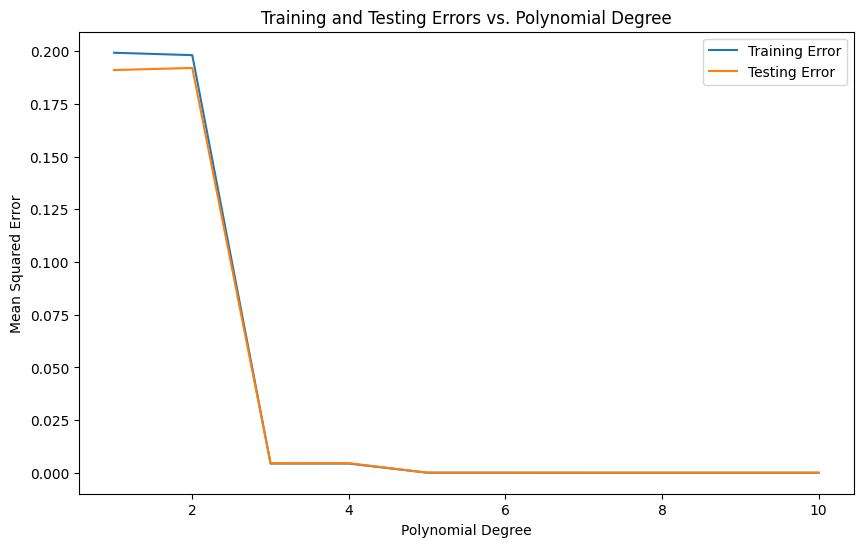

In [20]:
train_errors = []
test_errors = []
degrees = range(1, 11)  # Try polynomial degrees from 1 to 10

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on training and testing data
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the training and testing errors
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error')
plt.plot(degrees, test_errors, label='Testing Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Errors vs. Polynomial Degree')
plt.legend()
plt.show()


Optimal Polynomial Degree: 2
Test MSE with optimal degree: 0.19213760377292657


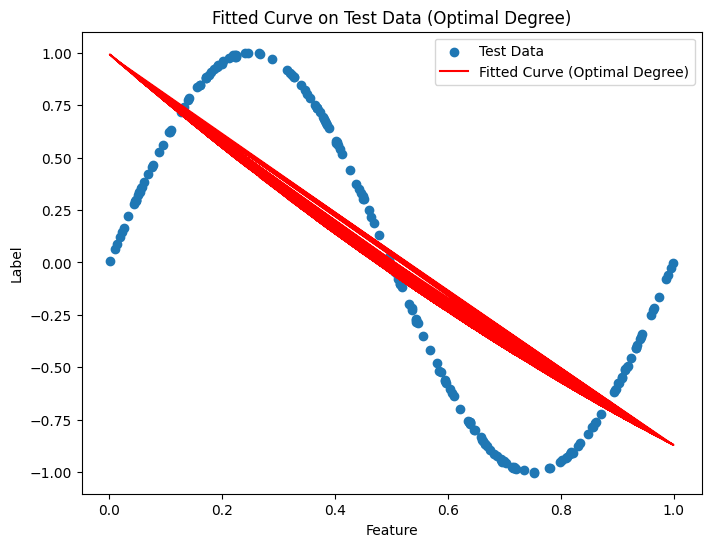

In [22]:
# Example: Selecting degree 2 as the optimal complexity.
optimal_degree = 2  # You might choose a different degree based on your analysis of the plot.
print("Optimal Polynomial Degree:", optimal_degree)

# Now, you can use this optimal degree to train your final model.
# Create polynomial features with the chosen degree.
poly = PolynomialFeatures(degree=optimal_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a linear regression model with the optimal degree.
model = LinearRegression()
model.fit(X_train_poly, y_train)

# You can evaluate the performance of the final model on the test set.
y_test_pred = model.predict(X_test_poly)
test_error = mean_squared_error(y_test, y_test_pred)
print("Test MSE with optimal degree:", test_error)

# You can also plot the fitted curve for the optimal degree along with the test data.
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Test Data')
plt.plot(X_test, y_test_pred, color='red', label='Fitted Curve (Optimal Degree)')
plt.xlabel('Feature')
plt.ylabel('Label')
plt.title('Fitted Curve on Test Data (Optimal Degree)')
plt.legend()
plt.show()



In [25]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'fit_intercept': [True, False],
    # 'normalize': [True, False],
    # Add other hyperparameters relevant to your model here
}

# Define the scoring metric
scoring = make_scorer(mean_squared_error, greater_is_better=False)  # Use MSE for regression

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=10,  # Number of random parameter combinations to try
    cv=5,  # Number of cross-validation folds
    scoring=scoring,
    random_state=42,
    verbose=2
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train_poly, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", random_search.best_params_)

# Get the best model from the search
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_pred_test)
print("Test MSE with best model:", test_mse)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
Best hyperparameters: {'fit_intercept': True}
Test MSE with best model: 0.19213760377292657


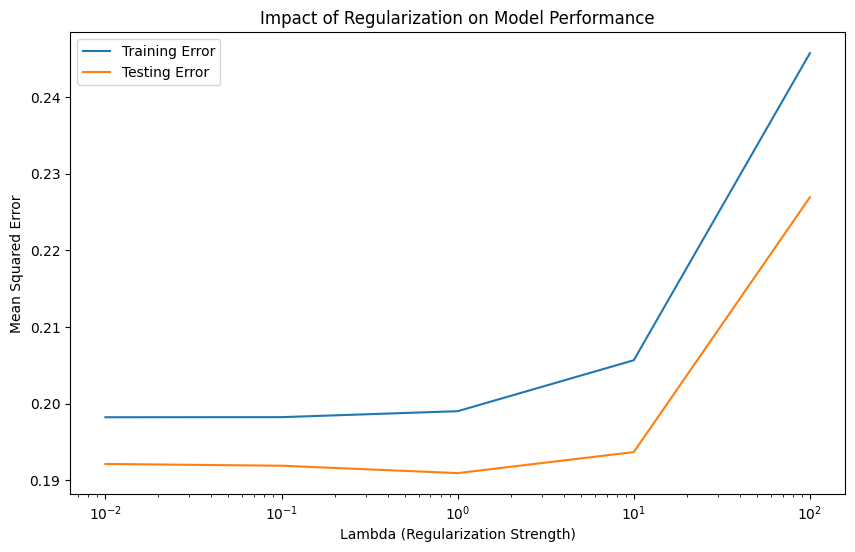

In [26]:
from sklearn.linear_model import Ridge

# Define a range of lambda (alpha) values to explore
lambda_values = [0.01, 0.1, 1, 10, 100]

# Lists to store training and testing errors for each lambda value
train_errors = []
test_errors = []

for lambda_val in lambda_values:
    # Create a Ridge regression model with the current lambda value
    model = Ridge(alpha=lambda_val)

    # Train the model
    model.fit(X_train_poly, y_train)

    # Predict on training and testing data
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the training and testing errors against lambda values
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, train_errors, label='Training Error')
plt.plot(lambda_values, test_errors, label='Testing Error')
plt.xscale('log')  # Use a logarithmic scale for lambda values
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Impact of Regularization on Model Performance')
plt.legend()
plt.show()

